In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('House_Data.csv')

# Display the first few rows
print(df.head())

              area_type   availability       size  society total_sqft  bath  \
0  Super built-up  Area         19-Dec      2 BHK  Coomee        1056   2.0   
1            Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   5.0   
2        Built-up  Area  Ready To Move      3 BHK      NaN       1440   2.0   
3  Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   3.0   
4  Super built-up  Area  Ready To Move      2 BHK      NaN       1200   2.0   

   balcony   price    site_location  
0      1.0   39.07      Alandi Road  
1      3.0  120.00  Ambegaon Budruk  
2      3.0   62.00       Anandnagar  
3      1.0   95.00            Aundh  
4      1.0   51.00       Aundh Road  


In [17]:

print(df.duplicated().sum())
df = df.drop_duplicates()

11


In [18]:
# Checking duplicated value removed or not
print(df.duplicated().sum())
print(df.isnull().sum())

0
area_type           0
availability        0
size               16
society          5495
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64


In [25]:

df[['site_location','society','size']] = df[['site_location','society','size']].fillna('N/A')

  # Verifying if missing values are handled

In [32]:
# Imputing missing values with the median

print(df.isnull().sum())
# median = df[['bath','balcony']].median()
df[['bath','balcony']] = df[['bath','balcony']].fillna(df[['bath','balcony']].median())
df.isnull().sum()

area_type                           0
availability                        0
size                                0
society                             0
total_sqft                          0
bath                               73
balcony                           609
price                               0
site_location                       0
(site_location, society, size)      0
dtype: int64


area_type                         0
availability                      0
size                              0
society                           0
total_sqft                        0
bath                              0
balcony                           0
price                             0
site_location                     0
(site_location, society, size)    0
dtype: int64

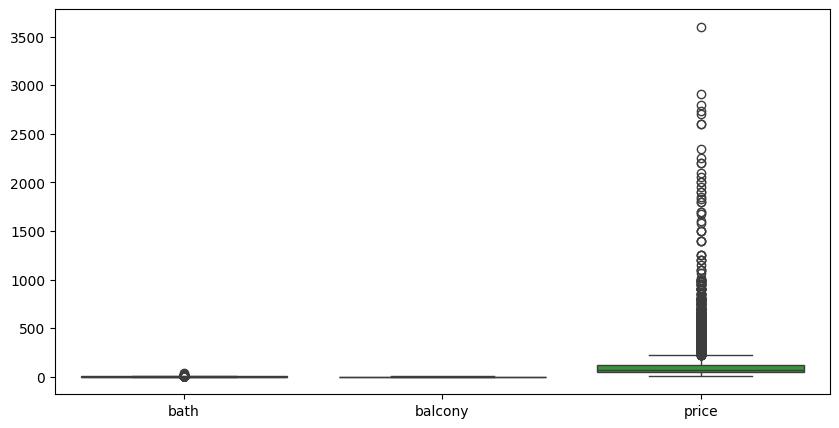

In [33]:
# Using Boxplot to visually identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

In [41]:
numeric_cols = df.select_dtypes(include=['number'])
Q1 = numeric_cols.quantile(0.05)
Q3 = numeric_cols.quantile(0.95)
IQR = Q3 - Q1
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
print(outliers.sum().sum())
# df[outliers].dropna()

111
